Problem 1

Model for X1: Y = 5.92782 + -2.03828*X1
Final Cost for X1: 0.98499


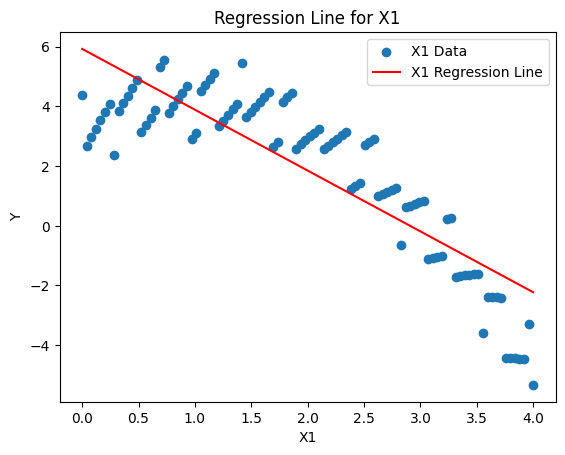

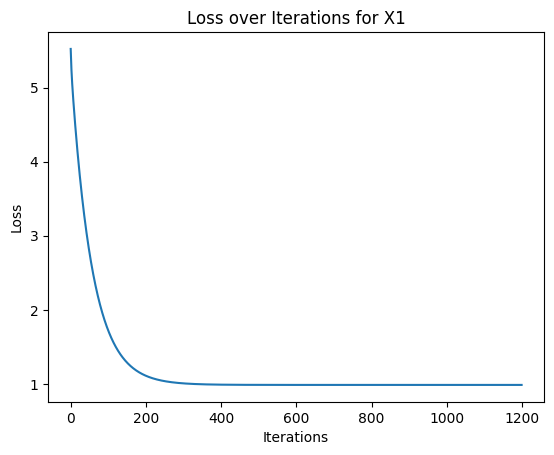

Model for X2: Y = 0.73605 + 0.55761*X2
Final Cost for X2: 3.59937


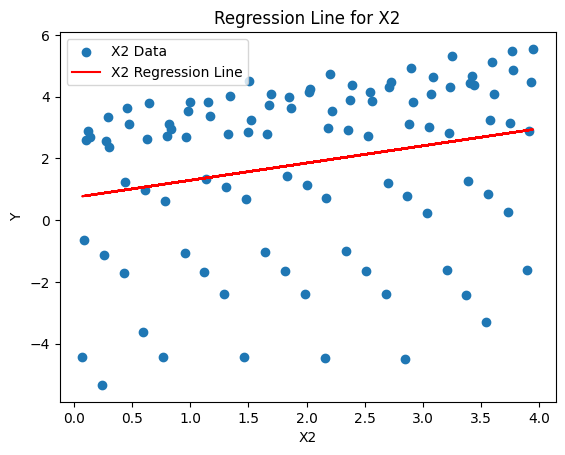

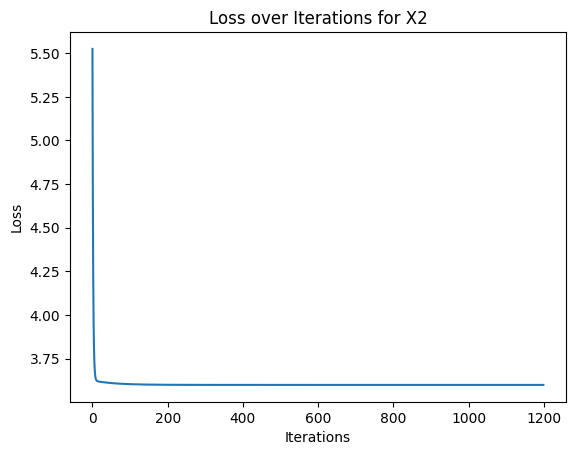

Model for X3: Y = 2.87137 + -0.52046*X3
Final Cost for X3: 3.62945


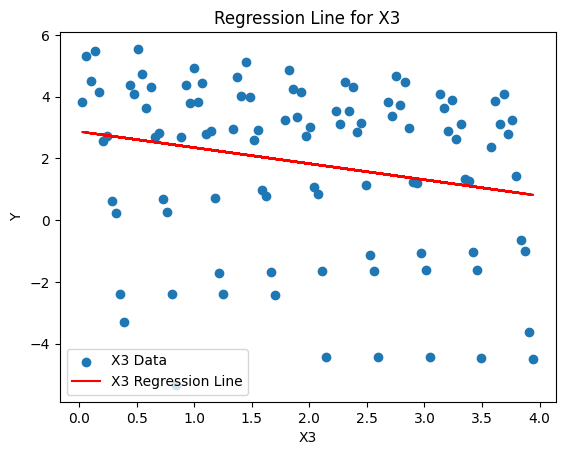

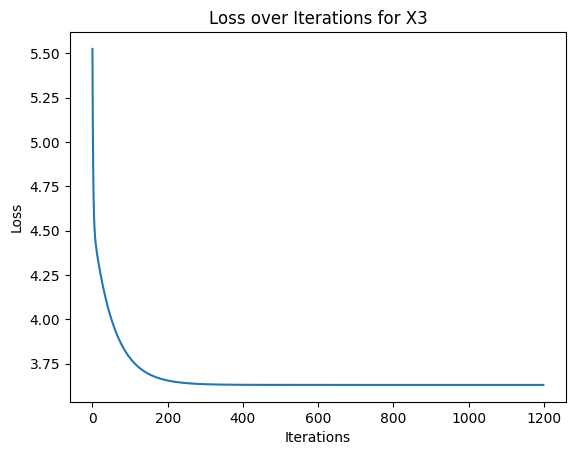

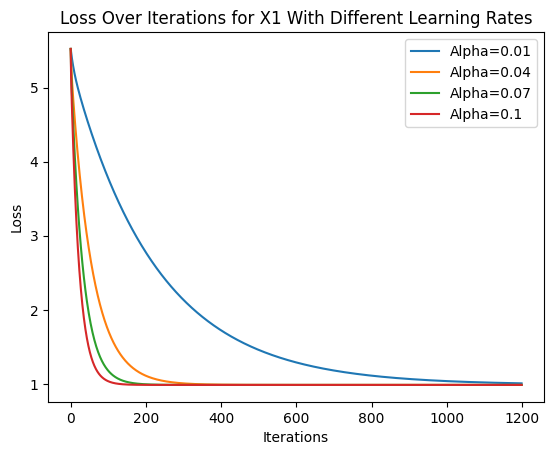

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('D3.csv')
X = data.iloc[:, :3].values
Y = data.iloc[:, 3].values

# Gradient descent function
def gradient_descent(X, Y, alpha, num_iters):
    m = len(Y)
    theta_0 = 0
    theta_1 = 0
    loss_history = []

    for _ in range(num_iters):
        h = theta_0 + theta_1 * X
        loss = (1 / (2 * m)) * np.sum((h - Y) ** 2)
        loss_history.append(loss)

        # Update theta
        theta_0 -= alpha * (1 / m) * np.sum(h - Y)
        theta_1 -= alpha * (1 / m) * np.sum((h - Y) * X)

    return theta_0, theta_1, loss_history

# Gradient descent for each variable
alphas = [0.01, 0.04, 0.07, 0.1]  # Different learning rates
num_iters = 1200

for i in range(3):
    theta_0, theta_1, loss_history = gradient_descent(X[:, i], Y, alpha=alphas[1], num_iters=num_iters)
    print(f"Model for X{i+1}: Y = {theta_0:.5f} + {theta_1:.5f}*X{i+1}")
    print(f"Final Cost for X{i+1}: {loss_history[-1]:.5f}")

    # Plot regression line
    plt.scatter(X[:, i], Y, label=f'X{i+1} Data')
    plt.plot(X[:, i], theta_0 + theta_1 * X[:, i], color='red', label=f'X{i+1} Regression Line')
    plt.title(f'Regression Line for X{i+1}')
    plt.xlabel(f'X{i+1}')
    plt.ylabel('Y')
    plt.legend()
    plt.show()

    # Plot loss over iterations
    plt.plot(range(num_iters), loss_history)
    plt.title(f'Loss over Iterations for X{i+1}')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.show()


for alpha in alphas:
    theta_0, theta_1, loss_history = gradient_descent(X[:, 0], Y, alpha=alpha, num_iters=num_iters)

    # Plot loss over iterations for X1
    plt.plot(range(num_iters), loss_history, label=f'Alpha={alpha}')
    plt.title(f'Loss Over Iterations for X{1} With Different Learning Rates')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.legend()


Problem 2

Model: Y = 5.27120 + -1.99765*X1 + 0.53966*X2 + -0.25930*X3
Final Cost: 0.73856

For X1 = 1, X2 = 1, X3 = 1, Predicted Y = 3.55391
For X1 = 2, X2 = 0, X3 = 4, Predicted Y = 0.23869
For X1 = 3, X2 = 2, X3 = 1, Predicted Y = 0.09827


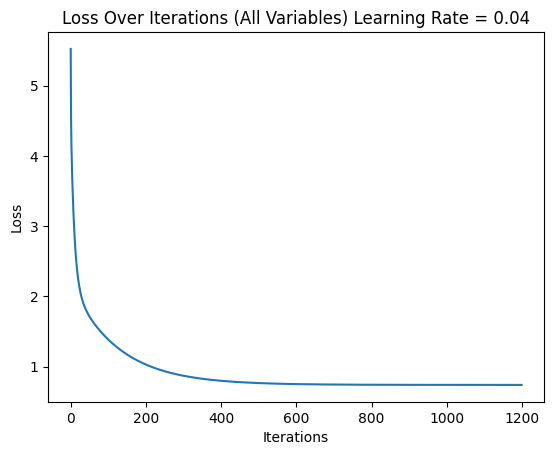

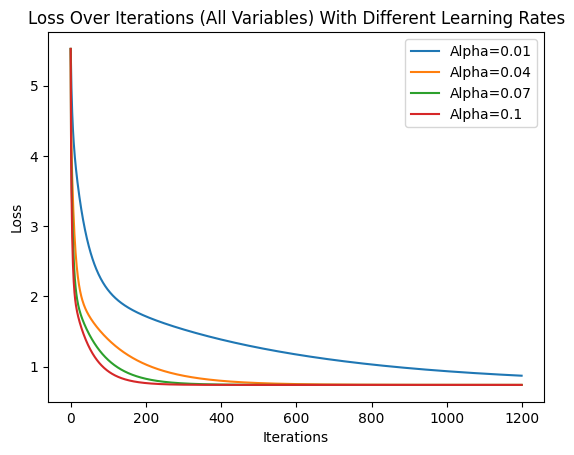

In [4]:
def gradient_descent_multivariate(X, Y, alpha, num_iters):
    m, n = X.shape
    theta = np.zeros(n+1)
    X_bias = np.c_[np.ones(m), X] # Add bias (theta_0 term)
    loss_history = []

    for _ in range(num_iters):
        h = X_bias @ theta
        loss = (1 / (2 * m)) * np.sum((h - Y) ** 2)
        loss_history.append(loss)

        # Update theta
        theta -= alpha * (1 / m) * (X_bias.T @ (h - Y))

    return theta, loss_history


# Gradient descent with all variables
#num_iters = 1500
theta, loss_history = gradient_descent_multivariate(X, Y, alpha=0.04, num_iters=num_iters)
print(f"Model: Y = {theta[0]:.5f} + {theta[1]:.5f}*X1 + {theta[2]:.5f}*X2 + {theta[3]:.5f}*X3")
print(f"Final Cost: {loss_history[-1]:.5f}\n")

# Points for prediction
points = [(1, 1, 1), (2, 0, 4), (3, 2, 1)]

for point in points:
    X1, X2, X3 = point
    Y_pred = theta[0] + theta[1]*X1 + theta[2]*X2 + theta[3]*X3
    print(f"For X1 = {X1}, X2 = {X2}, X3 = {X3}, Predicted Y = {Y_pred:.5f}")


# Plot loss over iterations
plt.plot(range(num_iters), loss_history)
plt.title('Loss Over Iterations (All Variables) Learning Rate = 0.04')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()


for alpha in alphas:
    theta_0, loss_history = gradient_descent_multivariate(X, Y, alpha=alpha, num_iters=num_iters)

    # Plot loss over iterations for X1
    plt.plot(range(num_iters), loss_history, label=f'Alpha={alpha}')
    plt.title(f'Loss Over Iterations (All Variables) With Different Learning Rates')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.legend()